Emission Profiles modeled with CHERAB
===

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from raysect.optical import World, Point3D, Vector3D, Spectrum
from cherab.phix.plasma import import_plasma
from cherab.phix.tools import import_phix_rtm, show_phix_profiles
plt.rcParams["figure.dpi"] = 150

In [2]:
world = World()
plasma, eq = import_plasma(world)
rtm = import_phix_rtm(world, eq)
model = [i for i in plasma.models]
model

loading plasma (data from: phix10)...


[<PlasmaModel - Bremsstrahlung>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(3, 2)>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(4, 2)>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(5, 2)>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(6, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(3, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(4, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(5, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(6, 2)>]

In [3]:
# set sample paramaters
dr = rtm.material.dr
dz = rtm.material.dz
nr = rtm.material.grid_shape[0]
nz = rtm.material.grid_shape[2]
rmin = rtm.material.rmin
zmin = rtm.transform[2, 3]
rmax = rmin + dr * nr
zmax = zmin + dz * nz

xrange = np.linspace(rmin, rmax, nr)
yrange = np.linspace(zmin, zmax, nz)
direction = Vector3D(0, 1, 0)
# H-balmar emission line
Halpha = (655.6, 656.8)
Hbeta = (485.6, 486.5)
Hgamma = (433.6, 434.4)

Bremsstrahlung emission
---

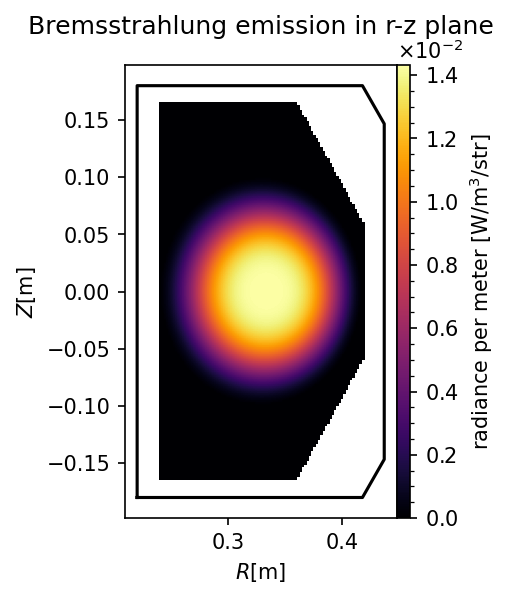

In [4]:
spectrum_bins = 500
min_wavelength = 375  # [nm]
max_wavelength = 780
radiance = np.zeros((nr, nz))
spectral_radiance = np.zeros((spectrum_bins, nr, nz))

for i, x in enumerate(xrange):
    for j, y in enumerate(yrange):
        emission = model[0].emission(Point3D(x, 0.0, y), direction,
                                     Spectrum(min_wavelength, max_wavelength, spectrum_bins))
        spectral_radiance[:, i, j] = emission.samples
        radiance[i, j] = emission.total()

# show profiles
fig, grid = show_phix_profiles([radiance], clabel="radiance per meter [W/m$^3$/str]",
                               cmap="inferno", rtm=rtm, scientific_notation=True)
grid[0].set_title("Bremsstrahlung emission in r-z plane", pad=15);
# fig.set_dpi(200)

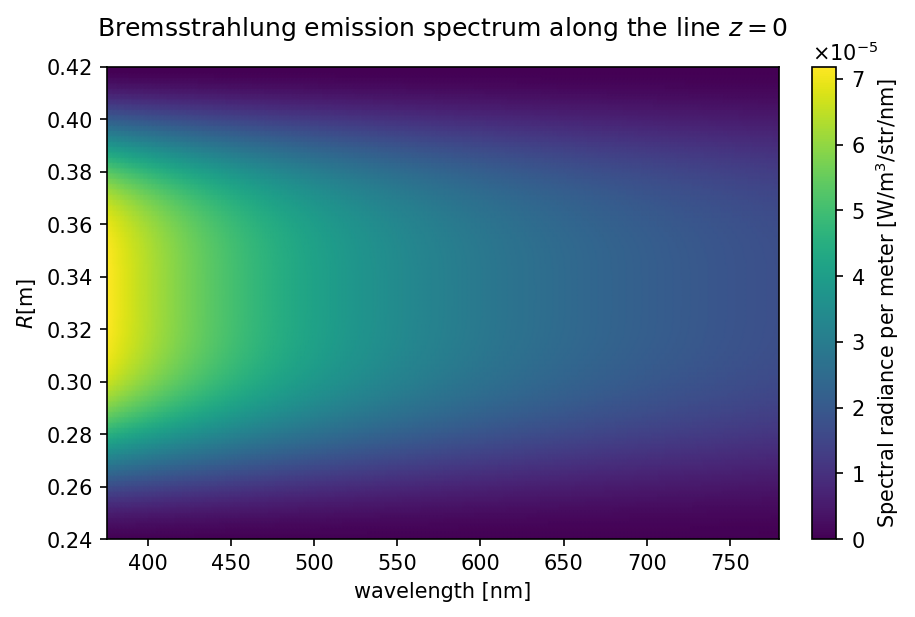

In [5]:
fig, ax = plt.subplots(1, constrained_layout=True)
pc = ax.pcolormesh(emission.wavelengths, xrange, spectral_radiance[:, :, np.where(yrange==0)[0][0]].T, shading="gouraud")
fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
pp = plt.colorbar(pc, label="Spectral radiance per meter [W/m$^3$/str/nm]", format=fmt)
pp.ax.yaxis.set_offset_position("left")
ax.set_xlabel("wavelength [nm]");
ax.set_ylabel("$R$[m]");
ax.set_title("Bremsstrahlung emission spectrum along the line $z=0$", pad=15);

Plot 1-D bremsstrahlung spectrum at $(r, z) = (0.34, 0)$ which is magnetic axis position.

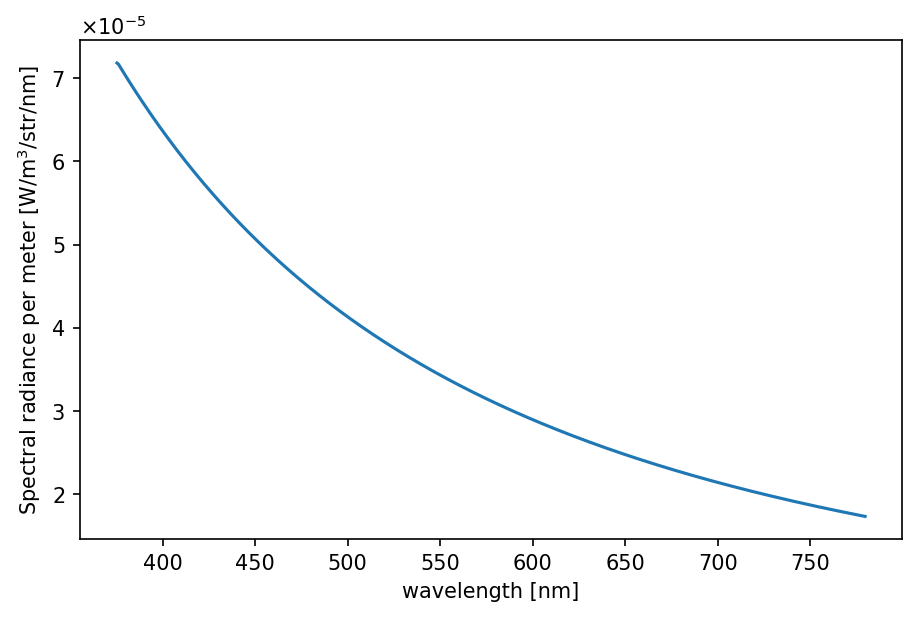

In [6]:
# spectral_radiance index at (r, z) = magnetic axis
idx = np.abs(xrange - eq.magnetic_axis.x).argmin()
idy = np.where(yrange==0)[0][0]

# plot 1-d spectrum
fig, ax = plt.subplots(1, constrained_layout=True)
ax.plot(emission.wavelengths, spectral_radiance[:, idx, idy])
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("Spectral radiance per meter [W/m$^3$/str/nm]")
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

Excitation emission of hydrogen balmar-series
----

In [7]:
spectrum_bins = 50
radiance = np.zeros((3, nr, nz))
spectral_radiance = np.zeros((3, spectrum_bins, nr, nz))  # number of Hydrogen lines (ax=0)
for i, x in enumerate(xrange):
    for j, y in enumerate(yrange):
        for k, waverange in enumerate([Halpha, Hbeta, Hgamma]):
            emission = model[k + 1].emission(Point3D(x, 0.0, y), direction,
                                             Spectrum(waverange[0], waverange[1], spectrum_bins))
            spectral_radiance[k, :, i, j] = emission.samples
            radiance[k, i, j] = emission.total()

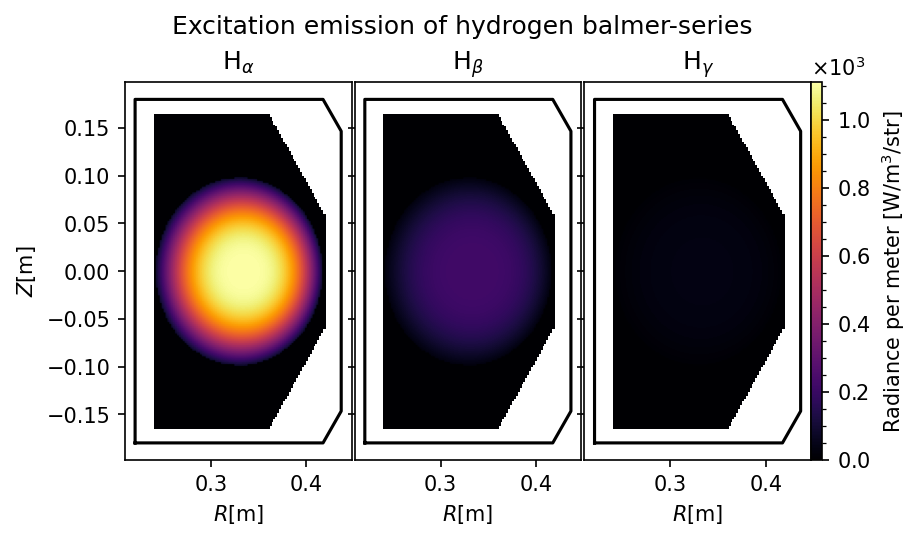

In [8]:
fig, grids = show_phix_profiles([radiance[k, :] for k in range(len(radiance[:, 0, 0]))],
                                clabel="Radiance per meter [W/m$^3$/str]",
                                cmap="inferno", rtm=rtm, cbar_mode="single", axes_pad=0.02)
for grid, name in zip(grids, ["$_\\alpha$", "$_\\beta$", "$_\\gamma$"]):
    grid.set_title(f"H{name}")
fig.suptitle("Excitation emission of hydrogen balmer-series", y=0.93);

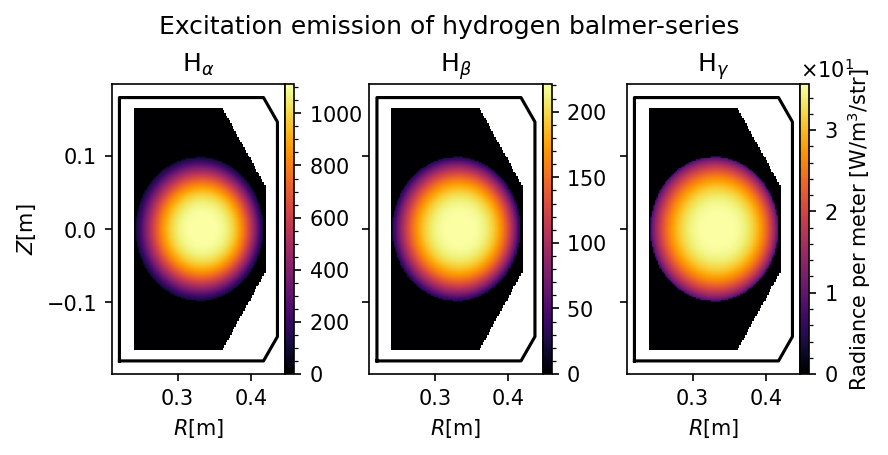

In [9]:
fig, grids = show_phix_profiles([radiance[k, :] for k in range(len(radiance[:, 0, 0]))], 
                                 clabel="Radiance per meter [W/m$^3$/str]",
                                 cmap="inferno", rtm=rtm, cbar_mode="each", axes_pad=0.5, )
for grid, name in zip(grids, ["$_\\alpha$", "$_\\beta$", "$_\\gamma$"]):
    grid.set_title(f"H{name}")
fig.suptitle("Excitation emission of hydrogen balmer-series", y=0.86);

Recombination emission of hydrogen balmar-series
----

In [10]:
spectrum_bins = 50
radiance = np.zeros((3, nr, nz))
spectral_radiance = np.zeros((3, spectrum_bins, nr, nz))  # number of Hydrogen lines (ax=0)
for i, x in enumerate(xrange):
    for j, y in enumerate(yrange):
        for k, waverange in enumerate([Halpha, Hbeta, Hgamma]):
            emission = model[k + 5].emission(Point3D(x, 0.0, y), direction,
                                             Spectrum(waverange[0], waverange[1], spectrum_bins))
            spectral_radiance[k, :, i, j] = emission.samples
            radiance[k, i, j] = emission.total()

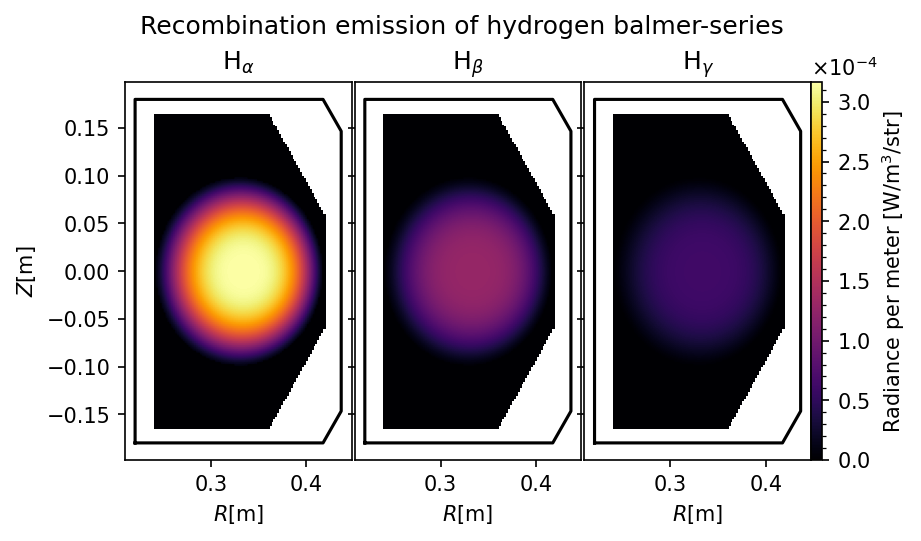

In [11]:
fig, grids = show_phix_profiles([radiance[k, :] for k in range(3)], clabel="Radiance per meter [W/m$^3$/str]",
                                cmap="inferno", rtm=rtm, cbar_mode="single", scientific_notation=True)
for grid, name in zip(grids, ["$_\\alpha$", "$_\\beta$", "$_\\gamma$"]):
    grid.set_title(f"H{name}")
fig.suptitle("Recombination emission of hydrogen balmer-series", y=0.93);

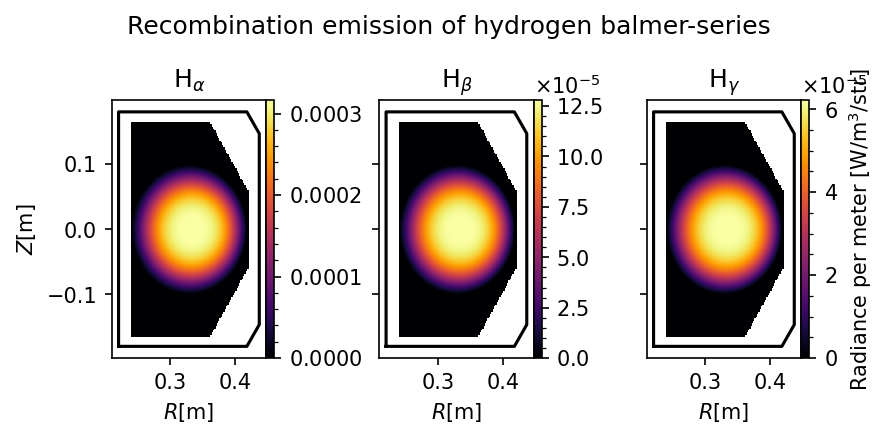

In [12]:
fig, grids = show_phix_profiles([radiance[k, :] for k in range(3)],
                                clabel="Radiance per meter [W/m$^3$/str]",
                                cmap="inferno", rtm=rtm, cbar_mode="each",
                                scientific_notation=True, axes_pad=0.7)
for grid, name in zip(grids, ["$_\\alpha$", "$_\\beta$", "$_\\gamma$"]):
    grid.set_title(f"H{name}")
fig.suptitle("Recombination emission of hydrogen balmer-series", y=0.86);

Spectral Radiance per meter at magnetic axis in hydrogen balmar-series
---

In [13]:
spectrum_bins = 50
spectral_radiance_e = np.zeros((3, spectrum_bins))
spectral_radiance_r = np.zeros((3, spectrum_bins))
for k, waverange in enumerate([Halpha, Hbeta, Hgamma]):
    emission_e = model[k + 1].emission(Point3D(eq.magnetic_axis.x, 0.0, eq.magnetic_axis.y), direction,
                                     Spectrum(waverange[0], waverange[1], spectrum_bins))
    emission_r = model[k + 5].emission(Point3D(eq.magnetic_axis.x, 0.0, eq.magnetic_axis.y), direction,
                                     Spectrum(waverange[0], waverange[1], spectrum_bins))
    spectral_radiance_e[k, :] = emission_e.samples
    spectral_radiance_r[k, :] = emission_r.samples

In [14]:
wavelength = np.concatenate([np.linspace(*Hgamma, len(spectral_radiance[2])),
                             np.linspace(*Hbeta, len(spectral_radiance[1])),
                             np.linspace(*Halpha, len(spectral_radiance[0]))])
spectrum_ex = np.concatenate([spectral_radiance_e[i, :] for i in [2, 1, 0]])
spectrum_re = np.concatenate([spectral_radiance_r[i, :] for i in [2, 1, 0]])

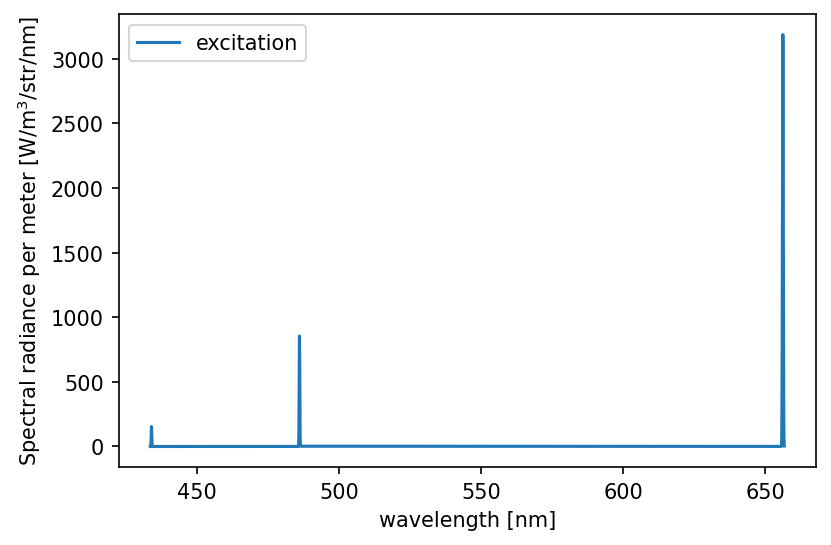

In [15]:
fig, ax = plt.subplots()
ax.plot(wavelength, spectrum_ex, label="excitation")
# ax.plot(wavelength, spectrum_re, label="recombination")
ax.legend()
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("Spectral radiance per meter [W/m$^3$/str/nm]");

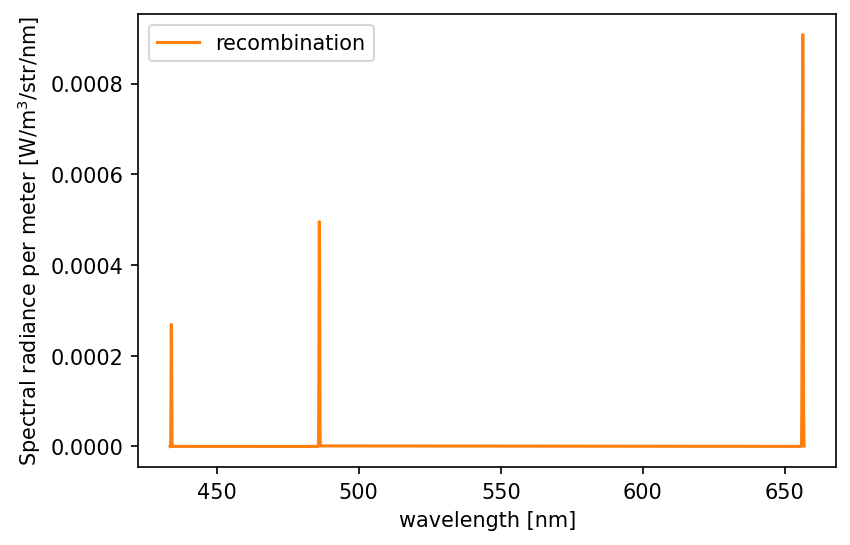

In [16]:
fig, ax = plt.subplots()
# ax.plot(wavelength, spectrum_ex, label="excitation")
ax.plot(wavelength, spectrum_re, label="recombination", color="C1")
ax.legend()
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("Spectral radiance per meter [W/m$^3$/str/nm]");